In [103]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,2))
cv.fit(['Thor Hathodewala is looking for a job'])
cv.vocabulary_

{'thor': 9,
 'hathodewala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodewala': 10,
 'hathodewala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

In [104]:
corpus = [
    'Thor ate Pizza',
    'Loki is tall',
    'Loki is eating pizza'
]

In [105]:
import spacy

nlp = spacy.load('en_core_web_sm')

def preprocess(text):
    doc = nlp(text)

    filtered_token = []

    for token in doc:
      if token.is_stop or token.is_punct:
        continue
      filtered_token.append(token.lemma_)

    return ' '.join(filtered_token)


In [106]:
preprocess(corpus[2])

'Loki eat pizza'

In [107]:
corpus_proccessed = [preprocess(text) for text in corpus]

In [108]:
corpus_proccessed

['thor eat Pizza', 'Loki tall', 'Loki eat pizza']

In [109]:
cv = CountVectorizer(ngram_range=(1,2))
cv.fit(corpus_proccessed)

CountVectorizer(ngram_range=(1, 2))

In [110]:
cv.transform(['Thor ate pizza']).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 1, 0]])

In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd

df = pd.read_json('/content/drive/MyDrive/news_dataset.json')

In [113]:
df.head()

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [114]:
df['category'].value_counts()

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [115]:
# Get the count of the minority class (SCIENCE)
science_count = df[df['category'] == 'SCIENCE'].shape[0]

# Undersample each category to the count of the minority class
df_undersampled = df.groupby('category').apply(lambda x: x.sample(n=science_count, random_state=38))

# Reset the index
df_undersampled = df_undersampled.reset_index(drop=True)

In [116]:
df_undersampled['category'].value_counts()

category
BUSINESS    1381
CRIME       1381
SCIENCE     1381
SPORTS      1381
Name: count, dtype: int64

In [117]:
df_undersampled['category'] = df_undersampled['category'].map({'BUSINESS':0, 'SPORTS':1, 'CRIME':2, 'SCIENCE':3})

In [118]:
df_undersampled['category'].value_counts()

category
0    1381
2    1381
3    1381
1    1381
Name: count, dtype: int64

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_undersampled['text'], df_undersampled['category'], test_size=0.3, random_state=38, stratify=df_undersampled['category'])

In [120]:
y_train.value_counts()

category
0    967
2    967
3    966
1    966
Name: count, dtype: int64

In [121]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [122]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('classifier', MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('classifier', MultinomialNB())])

In [123]:
y_pred = clf.predict(X_test)

In [124]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       414
           1       0.93      0.86      0.89       415
           2       0.86      0.91      0.88       414
           3       0.92      0.82      0.87       415

    accuracy                           0.87      1658
   macro avg       0.88      0.87      0.87      1658
weighted avg       0.88      0.87      0.87      1658



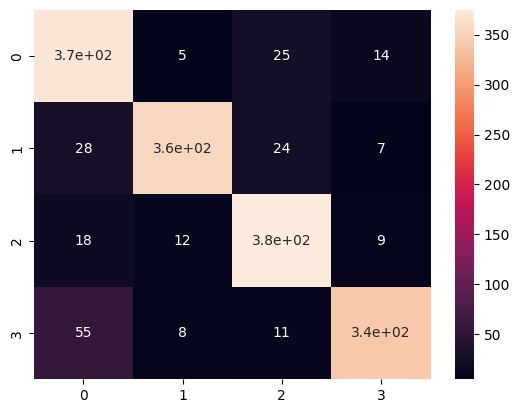

In [125]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt


sns.heatmap(cm, annot = True)
plt.show()

In [126]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('classifier', MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [127]:
y_pred = clf.predict(X_test)

In [128]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.90      0.79       414
           1       0.93      0.82      0.87       415
           2       0.86      0.89      0.87       414
           3       0.93      0.77      0.84       415

    accuracy                           0.84      1658
   macro avg       0.86      0.84      0.84      1658
weighted avg       0.86      0.84      0.84      1658



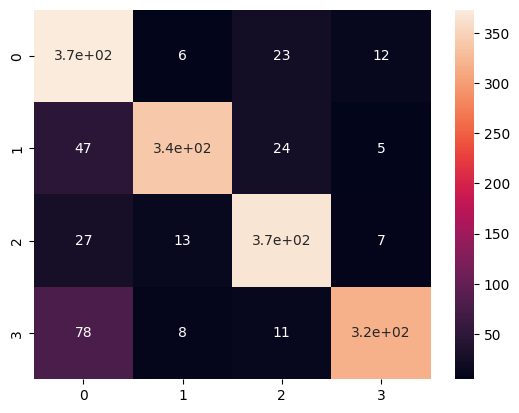

In [129]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [130]:
df_undersampled['preprocessed_txt'] = df_undersampled['text'].apply(preprocess)

In [131]:
df_undersampled.head()

,text,category,preprocessed_txt
0,Climate Change Poses A Big Risk To Your Retire...,0,climate Change pose big risk Retirement Saving...
1,The 10 Cities With The Longest Work Weeks Feel...,0,10 Cities Longest Work Weeks feeling overworke...
2,Vision Matters: Thought-Leadership Strategies ...,0,Vision Matters Thought Leadership Strategies S...
3,Ich Bin Ein Cavalier: What We Can Learn From L...,0,Ich Bin Ein Cavalier learn LeBron german Socce...
4,"Work Stress Is A Major Health Problem, Even Fo...",0,work Stress Major Health Problem CEOs Workplac...


In [132]:
X_train, X_test, y_train, y_test = train_test_split(df_undersampled['preprocessed_txt'], df_undersampled['category'], test_size=0.3, random_state=38, stratify=df_undersampled['category'])

In [133]:
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('classifier', MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('classifier', MultinomialNB())])

In [134]:
y_pred = clf.predict(X_test)

In [135]:
print('Classification Report:\n', classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       414
           1       0.93      0.86      0.89       415
           2       0.85      0.93      0.89       414
           3       0.91      0.82      0.86       415

    accuracy                           0.88      1658
   macro avg       0.88      0.88      0.88      1658
weighted avg       0.88      0.88      0.88      1658



In [135]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()